In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [2]:
def rmsle(actual_column, predicted_column):
    sum=0.0
    for x,y in zip(actual_column,predicted_column):
        if x<0 or y<0: #check for negative values. 
            continue
        p = np.log(y+1)
        r = np.log(x+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted_column))**0.5

In [36]:
data=pd.read_csv("Train.csv")
data.head()

ID account_type gender  age  region_code  cc_cons_apr  dc_cons_apr  \
0  12554      current      M   35          708     24893.00       378.00   
1  17645      current      M   35          123     18941.62       966.00   
2   7604      current      M   55          802      5678.87      2724.00   
3   1590      current      F   29          867     30489.50      1236.00   
4  16556      current      M   34          802      7441.40      6906.04   

   cc_cons_may  dc_cons_may  cc_cons_jun  ...  debit_count_may  \
0     10288.00     29664.00     16291.40  ...               40   
1     20672.00       287.00      4217.00  ...               78   
2      1964.50      3933.11     23956.25  ...               82   
3     12609.88      9138.14     17521.00  ...               38   
4      4364.00      1939.00      2121.00  ...               50   

   max_credit_amount_may  debit_amount_jun  credit_amount_jun  \
0                24563.0          30051.32            12761.0   
1                23948.0          42119.05            76206.0   
2                10752.0          58373.25            75283.0   
3                12607.0          69851.51            68708.0   
4                25213.0          10071.00            80140.0   

   credit_count_jun  debit_count_jun  max_credit_amount_jun  loan_enq  \
0                 2               65                50836.0         Y   
1                21               63                23226.0         Y   
2                 7                1                27036.0         Y   
3                21               83                43037.0         Y   
4                 8               32                32044.0         Y   

   emi_active  cc_cons  
0     1674.09    20014  
1    13043.34    10173  
2    25375.27    16095  
3     3544.33     7707  
4    12780.44    96408  

[5 rows x 44 columns]

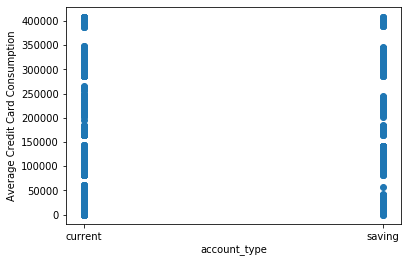

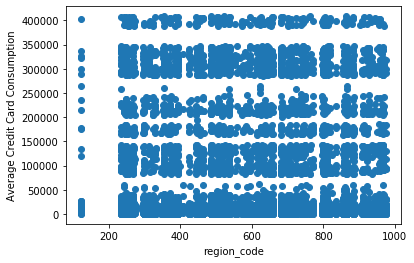

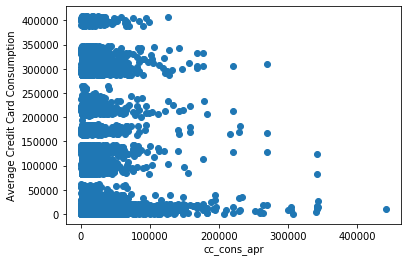

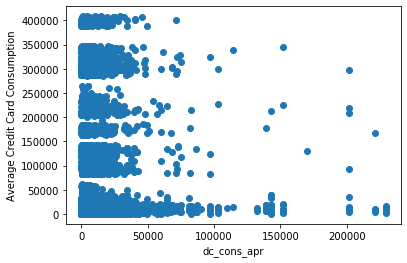

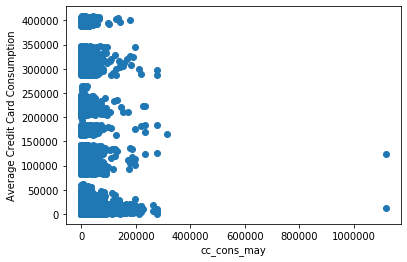

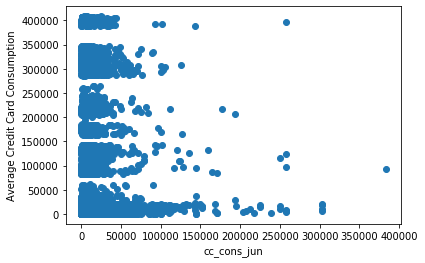

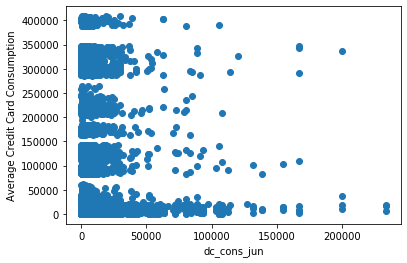

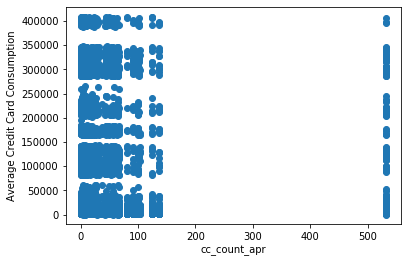

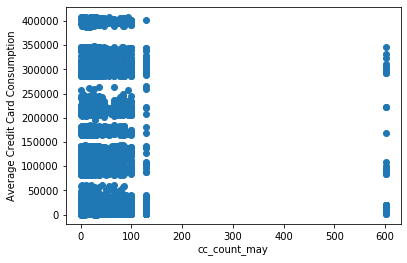

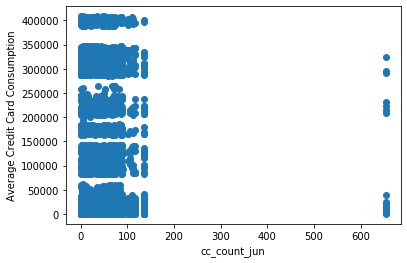

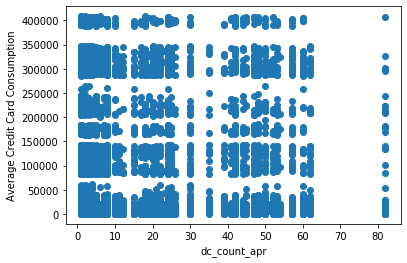

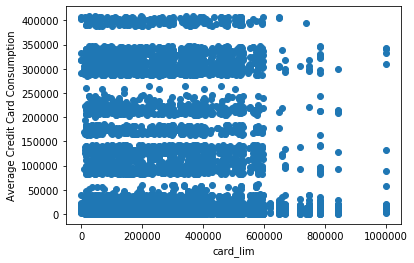

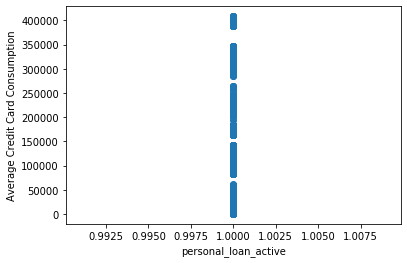

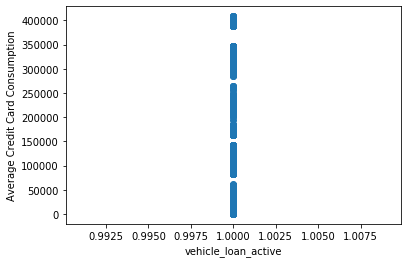

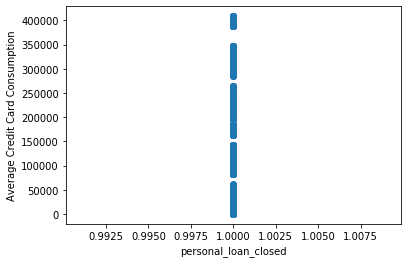

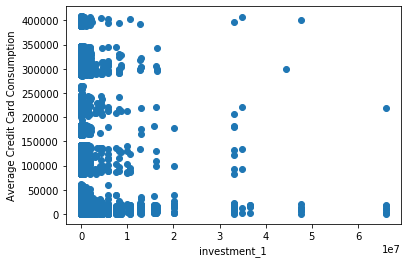

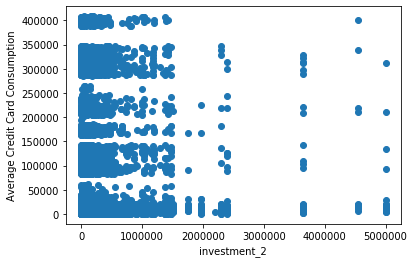

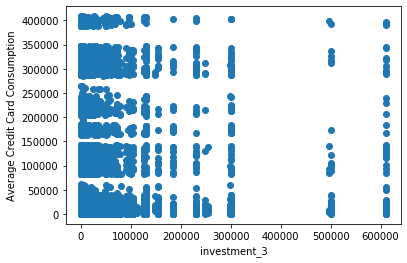

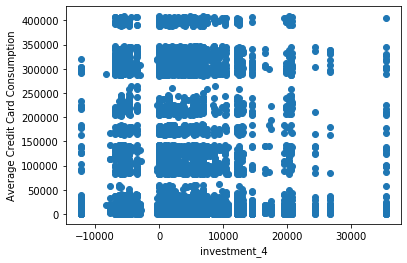

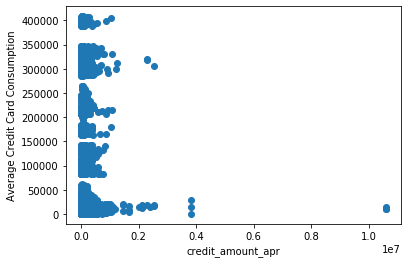

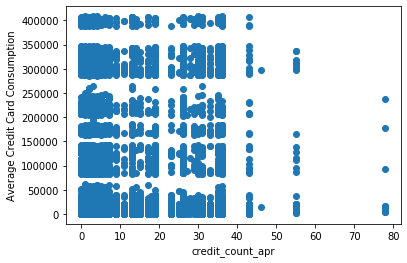

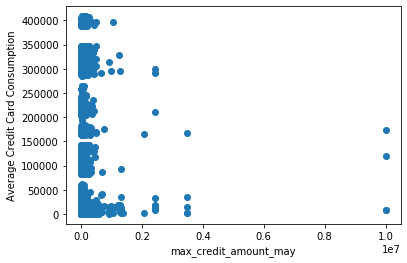

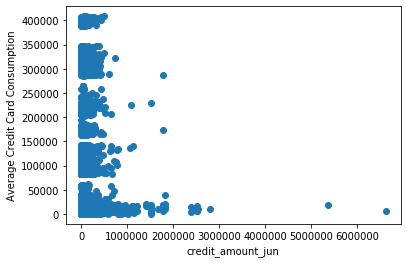

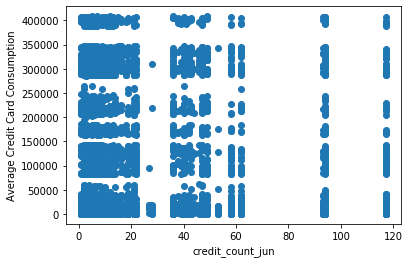

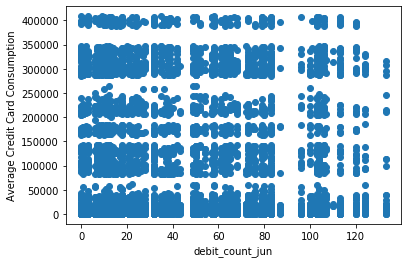

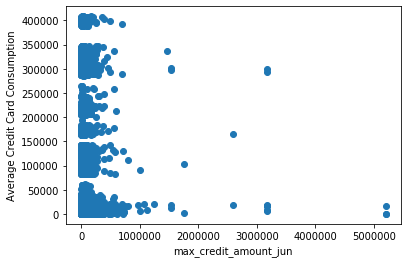

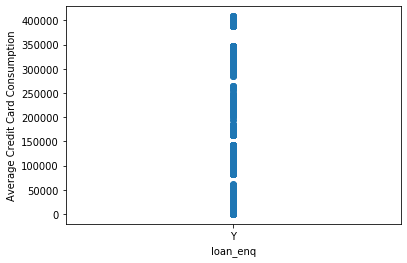

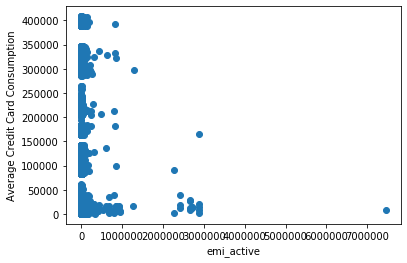

In [4]:
for cols in data.drop(['cc_cons','ID'],1).columns:
    plt.scatter(data[cols], data['cc_cons'])
    plt.xlabel(cols)
    plt.ylabel('Average Credit Card Consumption')
    plt.show()

In [37]:
le_account_type=LabelEncoder()
data['account_type']=le_account_type.fit_transform(data['account_type'])

le_gender=LabelEncoder()
data['gender']=le_gender.fit_transform(data['gender'])

le_loan_enq=LabelEncoder()
data['loan_enq']=le_loan_enq.fit_transform(data['loan_enq'])

In [103]:
#for cols in data.drop(['cc_cons','ID',],1).columns:
#    plt.boxplot(data[cols],showfliers=True)
 #   plt.xlabel(cols)
  #  plt.ylabel('Frequency')
   # plt.show()

In [38]:
data.head()

ID  account_type  gender  age  region_code  cc_cons_apr  dc_cons_apr  \
0  12554             0       1   35          708     24893.00       378.00   
1  17645             0       1   35          123     18941.62       966.00   
2   7604             0       1   55          802      5678.87      2724.00   
3   1590             0       0   29          867     30489.50      1236.00   
4  16556             0       1   34          802      7441.40      6906.04   

   cc_cons_may  dc_cons_may  cc_cons_jun  ...  debit_count_may  \
0     10288.00     29664.00     16291.40  ...               40   
1     20672.00       287.00      4217.00  ...               78   
2      1964.50      3933.11     23956.25  ...               82   
3     12609.88      9138.14     17521.00  ...               38   
4      4364.00      1939.00      2121.00  ...               50   

   max_credit_amount_may  debit_amount_jun  credit_amount_jun  \
0                24563.0          30051.32            12761.0   
1                23948.0          42119.05            76206.0   
2                10752.0          58373.25            75283.0   
3                12607.0          69851.51            68708.0   
4                25213.0          10071.00            80140.0   

   credit_count_jun  debit_count_jun  max_credit_amount_jun  loan_enq  \
0                 2               65                50836.0         0   
1                21               63                23226.0         0   
2                 7                1                27036.0         0   
3                21               83                43037.0         0   
4                 8               32                32044.0         0   

   emi_active  cc_cons  
0     1674.09    20014  
1    13043.34    10173  
2    25375.27    16095  
3     3544.33     7707  
4    12780.44    96408  

[5 rows x 44 columns]

In [7]:
data.skew()

ID                       -0.000523
account_type              1.943852
gender                   -2.111613
age                       4.386093
region_code              -0.118365
cc_cons_apr               4.838710
dc_cons_apr               7.135574
cc_cons_may              12.056921
dc_cons_may              25.321685
cc_cons_jun               6.108982
dc_cons_jun               6.569554
cc_count_apr              4.417547
cc_count_may              7.518349
cc_count_jun              7.190550
dc_count_apr              1.102698
dc_count_may              1.526300
dc_count_jun              0.732877
card_lim                  0.442569
personal_loan_active      0.000000
vehicle_loan_active       0.000000
personal_loan_closed      0.000000
vehicle_loan_closed       0.000000
investment_1             11.603971
investment_2              5.475358
investment_3              4.075013
investment_4              1.084492
debit_amount_apr         13.104348
credit_amount_apr        32.632376
debit_count_apr     

In [8]:
data.corr().cc_cons*100

ID                         0.466553
account_type               0.292854
gender                     0.228862
age                       -0.696487
region_code               -1.882436
cc_cons_apr                0.615490
dc_cons_apr               -0.012613
cc_cons_may                2.182210
dc_cons_may               -0.064177
cc_cons_jun               -0.089962
dc_cons_jun                0.286250
cc_count_apr              -0.975986
cc_count_may               1.643288
cc_count_jun              -0.200545
dc_count_apr              -0.075792
dc_count_may               0.771139
dc_count_jun              -0.619331
card_lim                  -0.315465
personal_loan_active            NaN
vehicle_loan_active             NaN
personal_loan_closed            NaN
vehicle_loan_closed             NaN
investment_1               0.408554
investment_2               0.887666
investment_3              -1.145293
investment_4               0.192899
debit_amount_apr           0.393668
credit_amount_apr          0

In [39]:
for col in data.drop('ID',1).columns:
    if data[col].skew()>0:
        data[col]=np.sqrt(data[col])
    else :
        data[col]=np.square(data[col])

In [40]:
data.skew()

ID                      -0.000523
account_type             1.943852
gender                  -2.111613
age                      3.104259
region_code              0.361884
cc_cons_apr              1.627942
dc_cons_apr              2.207385
cc_cons_may              2.002009
dc_cons_may              3.294896
cc_cons_jun              1.890619
dc_cons_jun              2.317558
cc_count_apr             2.653844
cc_count_may             1.677811
cc_count_jun             0.932037
dc_count_apr             0.592788
dc_count_may             0.884374
dc_count_jun             0.219475
card_lim                -0.254473
personal_loan_active     0.000000
vehicle_loan_active      0.000000
personal_loan_closed     0.000000
vehicle_loan_closed      0.000000
investment_1             4.713771
investment_2             1.784030
investment_3             1.833091
investment_4             0.394800
debit_amount_apr         2.415966
credit_amount_apr        4.068821
debit_count_apr          0.244746
credit_count_a

In [41]:
df2=data.set_index('ID').drop(['loan_enq','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed'],1)
df2.head()

account_type  gender       age  region_code  cc_cons_apr  dc_cons_apr  \
ID                                                                             
12554           0.0       1  5.916080       501264   157.775156    19.442222   
17645           0.0       1  5.916080        15129   137.628558    31.080541   
7604            0.0       1  7.416198       643204    75.358278    52.191953   
1590            0.0       0  5.385165       751689   174.612428    35.156792   
16556           0.0       1  5.830952       643204    86.263550    83.102587   

       cc_cons_may  dc_cons_may  cc_cons_jun  dc_cons_jun  ...  \
ID                                                         ...   
12554   101.429779   172.232401   127.637769   106.920531  ...   
17645   143.777606    16.941074    64.938432    29.748950  ...   
7604     44.322680    62.714512   154.778067    71.888803  ...   
1590    112.293722    95.593619   132.366914   116.834498  ...   
16556    66.060578    44.034078    46.054316    82.638853  ...   

       credit_count_may  debit_count_may  max_credit_amount_may  \
ID                                                                
12554          1.414214         6.324555             156.725875   
17645          1.414214         8.831761             154.751414   
7604           1.414214         9.055385             103.691851   
1590           4.795832         6.164414             112.280898   
16556          4.898979         7.071068             158.786020   

       debit_amount_jun  credit_amount_jun  credit_count_jun  debit_count_jun  \
ID                                                                              
12554        173.353166         112.964596          1.414214         8.062258   
17645        205.229262         276.054342          4.582576         7.937254   
7604         241.605567         274.377477          2.645751         1.000000   
1590         264.294362         262.122109          4.582576         9.110434   
16556        100.354372         283.090092          2.828427         5.656854   

       max_credit_amount_jun  emi_active     cc_cons  
ID                                                    
12554             225.468401   40.915645  141.470845  
17645             152.400787  114.207443  100.861291  
7604              164.426275  159.296171  126.866071  
1590              207.453609   59.534276   87.789521  
16556             179.008380  113.050608  310.496377  

[5 rows x 38 columns]

In [42]:
df2.isna().sum()

account_type                0
gender                      0
age                         0
region_code                 0
cc_cons_apr                 0
dc_cons_apr                 0
cc_cons_may                 0
dc_cons_may                 0
cc_cons_jun                 0
dc_cons_jun                 0
cc_count_apr                0
cc_count_may                0
cc_count_jun                0
dc_count_apr                0
dc_count_may                0
dc_count_jun                0
card_lim                    0
investment_1                0
investment_2                0
investment_3                0
investment_4             3225
debit_amount_apr            0
credit_amount_apr           0
debit_count_apr             0
credit_count_apr            0
max_credit_amount_apr       0
debit_amount_may            0
credit_amount_may           0
credit_count_may            0
debit_count_may             0
max_credit_amount_may       0
debit_amount_jun            0
credit_amount_jun           0
credit_cou

In [43]:
df2.investment_4=df2.investment_4.fillna(0)

In [44]:
df2.isna().sum()

account_type             0
gender                   0
age                      0
region_code              0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              0
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
investment_1             0
investment_2             0
investment_3             0
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
emi_active               0
c

In [45]:
X=df2.drop('cc_cons',1)
y=df2['cc_cons']
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.25, random_state=5)

In [46]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
y_pred_train=lr.predict(X_train)
y_pred_val=lr.predict(X_val)

In [48]:
train_rmsle=rmsle(y_train, y_pred_train)
val_rmsle=rmsle(y_val, y_pred_val)
print(train_rmsle, val_rmsle)

0.8590876862180377 0.8644077440817093


In [63]:
test=pd.read_csv('Test.csv')
test.head()

ID account_type gender  age  region_code  cc_cons_apr  dc_cons_apr  \
0  17591      current      M   37          575      2795.45       1290.0   
1  13541      current      M   33          394     29405.13       1640.0   
2  13431      current      M   53          324      5985.20       6189.0   
3   8687      current      M   33          370      2105.93      18225.0   
4  14727      current      M   62          505      3269.00       3532.0   

   cc_cons_may  dc_cons_may  cc_cons_jun  ...  credit_count_may  \
0      6141.05       676.50      9146.10  ...              24.0   
1      1670.00      2463.92     10947.50  ...              43.0   
2      2696.09       766.00       716.00  ...              42.0   
3     34763.56       167.00      4260.27  ...               3.0   
4      3158.40      2699.77      3373.48  ...              70.0   

   debit_count_may  max_credit_amount_may  debit_amount_jun  \
0             20.0                 9750.0          30527.88   
1             40.0                16967.0          14342.83   
2             35.0                36398.0          32503.16   
3              5.0                97825.0          93572.42   
4             75.0                27936.0          19011.50   

   credit_amount_jun  credit_count_jun  debit_count_jun  \
0           31271.00               3.0             12.0   
1           16582.00               6.0             39.0   
2           33539.54               5.0              9.0   
3          109429.75              21.0              0.0   
4           41401.00               6.0             35.0   

   max_credit_amount_jun  loan_enq  emi_active  
0               25945.92         Y     1170.49  
1               12214.00         Y    16447.45  
2               13215.00         Y     2622.28  
3               72317.00         Y      340.79  
4               42344.00         Y     2812.20  

[5 rows x 43 columns]

In [64]:
test['account_type']=le_account_type.transform(test['account_type'])

test['gender']=le_gender.transform(test['gender'])

test['loan_enq']=le_loan_enq.transform(test['loan_enq'])

In [65]:
for col in test.drop('ID',1).columns:
    if test[col].skew()>0:
        test[col]=np.sqrt(test[col])
    else:
        test[col]=np.square(test[col])

C:\Users\AP hatela\Miniconda\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [66]:
X_test=test.set_index('ID').drop(['loan_enq','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed'],1)

In [67]:
#for col in X_test.drop(['account_type','gender'],1).columns:
 #   if X_test[col].skew()>0:
  #      X_test[col]=np.sqrt(X_test[col])
   # else:
    #    X_test[col]=np.square(X_test[col])

#X_test['account_type']=le_account_type.transform(X_test['account_type'])

#X_test['gender']=le_gender.transform(X_test['gender'])

In [68]:
X_test['investment_4']=X_test.fillna(0)

In [69]:
lr.coef_

array([ 3.29483246e+00,  2.94724572e+00, -5.41242049e-01, -7.61824787e-06,
        2.94610390e-02, -1.04252049e-03,  4.61402073e-02, -2.70748766e-02,
        1.59034099e-02, -1.46696517e-02, -5.44694148e-01,  1.15611108e+00,
        4.14523712e-01,  6.19825602e-01,  3.18394685e-01, -4.28532945e-01,
        1.71342399e-03,  1.75541457e-03, -1.59257842e-04, -1.31038338e-02,
        8.61325882e-03,  1.49226897e-03,  1.32967921e-02, -3.98583632e-01,
       -5.84310413e-02,  1.36212507e-02,  5.94760920e-03, -7.95515273e-04,
        9.55809522e-01,  4.19615770e-02,  1.38941956e-02, -8.47736941e-03,
       -4.94735722e-03,  6.93408594e-01, -2.25293347e-01,  9.82218760e-03,
        8.89233407e-03])

In [70]:
#X_test=X_test.fillna(0)

In [71]:
y_pred=lr.predict(X_test)

#X_test['cc_cons']=
y_pred**2

#result2=pd.DataFrame(X_test['cc_cons'])

#result2

#result2.to_csv('submission2.csv',index=True)

array([29820.58043946, 30850.45786838, 30398.30581903, ...,
       26838.54604338, 27972.69126533, 29188.22872496])

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(criterion='mse', bootstrap=False)
rf.fit(X_train, y_train)

C:\Users\AP hatela\Miniconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [62]:
pred_rf_train=rf.predict(X_train)
pred_rf_val=rf.predict(X_val)
train_rmsle=rmsle(pred_rf_train, y_train)
val_rmsle=rmsle(pred_rf_val, y_val)
print(train_rmsle, val_rmsle)

2.9945211991352845e-16 1.0896868132626003


In [65]:
y_pred=rf.predict(X_test)

y_pred**2

array([ 80.47574588, 290.02618631, 118.06858569, ...,  89.27444421,
        66.27781825,  83.7544883 ])